In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

sns.set(font_scale=1.15, rc={'figure.figsize':[12,8]})
sns.set_style('white')

df = pd.read_pickle('STING_DB.pkl')
df.head()

,n_patient,id,label,array,n_cores,sp,sp_date,turb,histo,lesion,...,bcg_date,mitomycin,progression_stage_any,progression_stage_next,recurrence_any,recurrence_next,progression_grade_any,progression_grade_next,fu_months,sp_bcg_timing
0,1,19870070301,OO,935,1.0,05-S-9869,2005-12-07,4,4,Non-tumor,...,NaT,0,No,Yes,Yes,Yes,No,Yes,270.933333,Pre
1,1,19870070301,OO,931,3.0,07-S-11432,2007-11-14,5,1,Low-grade,...,NaT,0,No,No,Yes,No,No,No,270.933333,Pre
2,1,19870070301,OO,931,3.0,07-S-11432,2007-11-14,5,1,Low-grade,...,NaT,0,No,No,Yes,No,No,No,270.933333,Pre
3,1,19870070301,OO,931,3.0,07-S-11432,2007-11-14,5,1,Low-grade,...,NaT,0,No,No,Yes,No,No,No,270.933333,Pre
4,1,19870070301,OO,931,3.0,05-S-4662,2005-06-10,3,2,High-grade,...,NaT,0,No,No,Yes,No,No,No,270.933333,Pre


# Mitomycin-treated cases

In [2]:
# Selecting rows with mitomycin treatment (i.e., mitomycin > 0)
df.query('mitomycin > 0', inplace=True)
df['sp'].nunique()

26

In [3]:
# Grouping by pathology case
unique = 'max'
estimator = 'mean'

df = df.groupby('sp').agg({
    'bcg':unique,
    'sting_tumor':estimator,'sting_inflammatory':estimator,
    'cgas_tumor':estimator,'cgas_inflammatory':estimator,
    'pirf3_tumor':estimator,'pirf3_inflammatory':estimator,
    'recurrence_next':unique,'recurrence_any':unique,
    'progression_grade_next':unique,'progression_grade_any':unique,
    'progression_stage_next':unique,'progression_stage_any':unique
})

df.head()

,bcg,sting_tumor,sting_inflammatory,cgas_tumor,cgas_inflammatory,pirf3_tumor,pirf3_inflammatory,recurrence_next,recurrence_any,progression_grade_next,progression_grade_any,progression_stage_next,progression_stage_any
sp,,,,,,,,,,,,,
06-S-10242,No,16.666667,100.0,70.0,10.00,0.0,0.00,Yes,Yes,No,No,No,No
06-S-9101,No,0.000000,NaN,100.0,NaN,5.0,NaN,Yes,Yes,No,No,No,No
06-S-9899,Yes,0.000000,100.0,34.0,33.75,0.0,0.25,Yes,Yes,No,No,No,No
07-S-3016,Yes,5.000000,100.0,30.0,25.00,1.0,47.50,Yes,Yes,No,No,No,No
07-S-429,No,0.000000,NaN,50.0,NaN,5.0,NaN,No,Yes,No,Yes,No,No


## Mitomycin treatment by BCG treatment

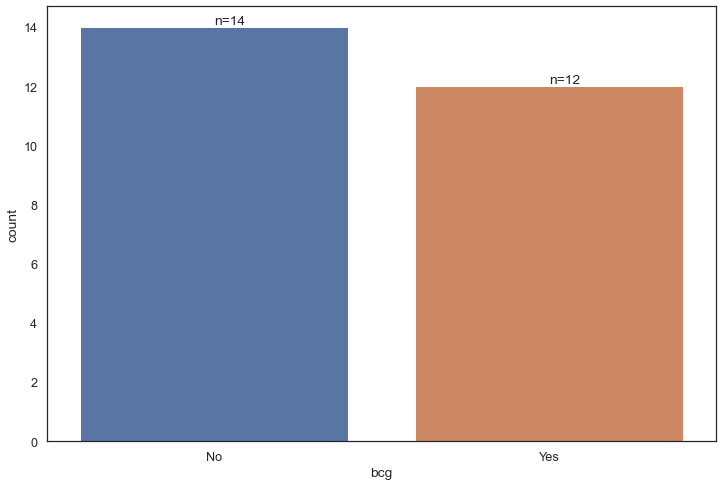

In [4]:
nums = df['bcg'].value_counts(sort=False)
sns.countplot(x='bcg', data=df)
for i in range(len(nums)):
    plt.annotate(text='n=' + str(nums[i]), xy=(i, nums[i]), va='bottom')
plt.show()

# Marker expression

## STING in tumor cells

,count,mean,std,min,25%,50%,75%,max
bcg,,,,,,,,
No,11.0,22.0,31.0,0.0,0.0,10.0,26.0,100.0
Yes,7.0,4.0,5.0,0.0,0.0,0.0,8.0,10.0


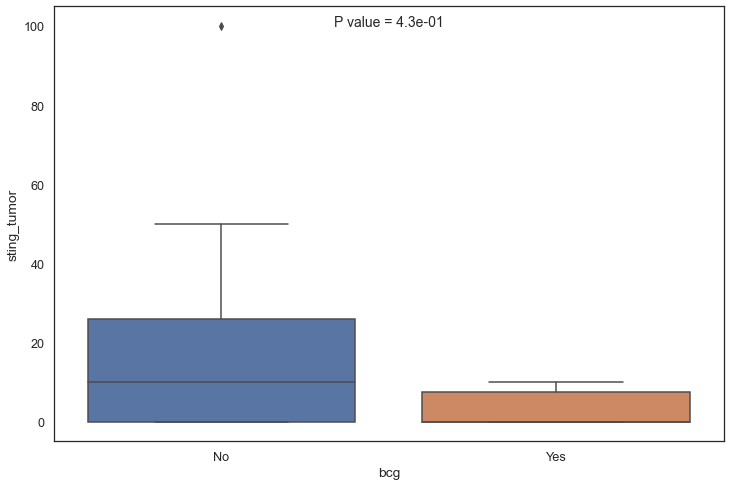

In [5]:
x = 'sting_tumor'
display(df.groupby('bcg')[x].describe().round())

p = scipy.stats.mannwhitneyu(*[data[x].values for name, data in df.groupby('bcg')])[1]

sns.boxplot(x='bcg', y=x, data=df)
plt.annotate(text='P value = {:.1e}'.format(p), xy=(0.5,100), ha='center', size=14)
plt.show()

## STING in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
bcg,,,,,,,,
No,6.0,82.0,40.0,0.0,92.0,100.0,100.0,100.0
Yes,7.0,99.0,4.0,90.0,100.0,100.0,100.0,100.0


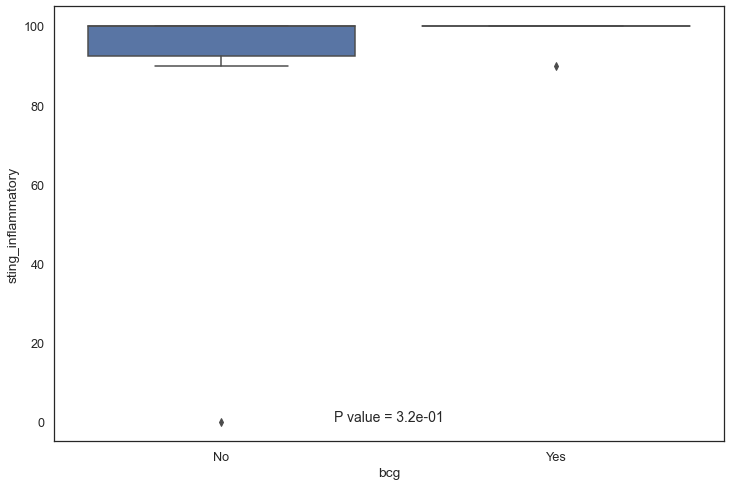

In [6]:
x = 'sting_inflammatory'
display(df.groupby('bcg')[x].describe().round())

p = scipy.stats.mannwhitneyu(*[data[x].values for name, data in df.groupby('bcg')])[1]

sns.boxplot(x='bcg', y=x, data=df)
plt.annotate(text='P value = {:.1e}'.format(p), xy=(0.5,0), ha='center', size=14)
plt.show()

## cGAS in tumor cells

,count,mean,std,min,25%,50%,75%,max
bcg,,,,,,,,
No,11.0,76.0,30.0,0.0,65.0,90.0,96.0,100.0
Yes,7.0,68.0,30.0,30.0,42.0,80.0,90.0,100.0


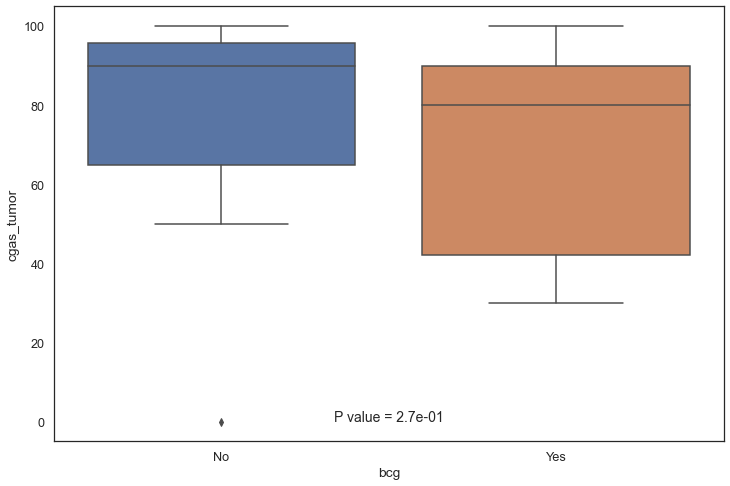

In [7]:
x = 'cgas_tumor'
display(df.groupby('bcg')[x].describe().round())

p = scipy.stats.mannwhitneyu(*[data[x].values for name, data in df.groupby('bcg')])[1]

sns.boxplot(x='bcg', y=x, data=df)
plt.annotate(text='P value = {:.1e}'.format(p), xy=(0.5,0), ha='center', size=14)
plt.show()

## cGAS in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
bcg,,,,,,,,
No,6.0,2.0,4.0,0.0,0.0,0.0,0.0,10.0
Yes,7.0,11.0,13.0,0.0,1.0,5.0,18.0,34.0


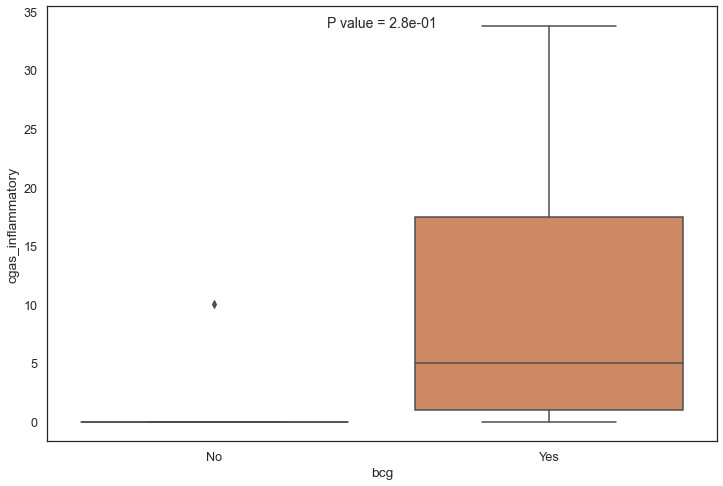

In [8]:
x = 'cgas_inflammatory'
display(df.groupby('bcg')[x].describe().round())

p = scipy.stats.mannwhitneyu(*[data[x].values for name, data in df.groupby('bcg')])[1]

sns.boxplot(x='bcg', y=x, data=df)
plt.annotate(text='P value = {:.1e}'.format(p), xy=(0.5,34), ha='center', va='center', size=14)
plt.show()

## pIRF3 in tumor cells

,count,mean,std,min,25%,50%,75%,max
bcg,,,,,,,,
No,11.0,6.0,9.0,0.0,0.0,1.0,7.0,30.0
Yes,7.0,1.0,2.0,0.0,0.0,0.0,0.0,5.0


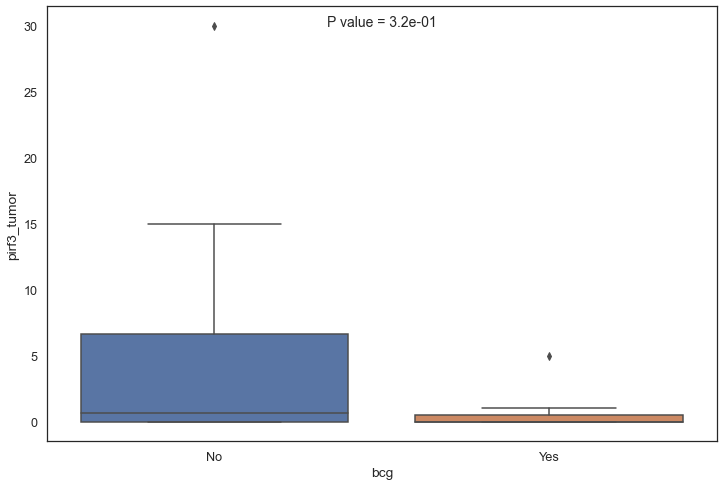

In [9]:
x = 'pirf3_tumor'
display(df.groupby('bcg')[x].describe().round())

p = scipy.stats.mannwhitneyu(*[data[x].values for name, data in df.groupby('bcg')])[1]

sns.boxplot(x='bcg', y=x, data=df)
plt.annotate(text='P value = {:.1e}'.format(p), xy=(0.5,30), ha='center', size=14)
plt.show()

## pIRF3 in peritumoral lymphocytes

,count,mean,std,min,25%,50%,75%,max
bcg,,,,,,,,
No,5.0,17.0,33.0,0.0,0.0,0.0,10.0,75.0
Yes,7.0,8.0,18.0,0.0,0.0,0.0,3.0,48.0


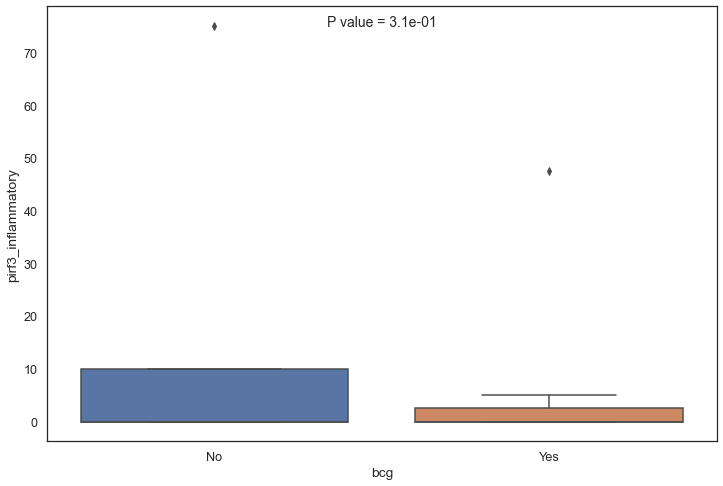

In [10]:
x = 'pirf3_inflammatory'
display(df.groupby('bcg')[x].describe().round())

p = scipy.stats.mannwhitneyu(*[data[x].values for name, data in df.groupby('bcg')])[1]

sns.boxplot(x='bcg', y=x, data=df)
plt.annotate(text='P value = {:.1e}'.format(p), xy=(0.5,75), ha='center', size=14)
plt.show()